In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data from kaggle 

link = "MassShootingsDataset.csv"
shooting_data = pd.read_csv(link, encoding='latin-1')
shooting_data.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [4]:
month = [d.split('/')[0] for d in shooting_data.Date]
day = [d.split('/')[1] for d in shooting_data.Date]
year = [d.split('/')[2] for d in shooting_data.Date]

In [5]:
list(shooting_data)

['S#',
 'Title',
 'Location',
 'Date',
 'Incident Area',
 'Open/Close Location',
 'Target',
 'Cause',
 'Summary',
 'Fatalities',
 'Injured',
 'Total victims',
 'Policeman Killed',
 'Age',
 'Employeed (Y/N)',
 'Employed at',
 'Mental Health Issues',
 'Race',
 'Gender',
 'Latitude',
 'Longitude']

In [6]:
#convert month to int

month = list(map(int, month))

In [7]:
#add columns
shooting_data["Year"]= year
shooting_data["Month"] = month
shooting_data["Day"] = day

#group by year and sum the total victims

shooting_data.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Year,Month,Day
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,NaN,NaN,No,White,M,NaN,NaN,2017,11,5
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,NaN,NaN,No,White,M,NaN,NaN,2017,11,1
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,NaN,Advance Granite Store,No,Black,M,NaN,NaN,2017,10,18
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,NaN,NaN,Unclear,White,M,36.181271,-115.134132,2017,10,1
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,1.0,NaN,Yes,Asian,M,NaN,NaN,2017,6,14


In [8]:
test_1=shooting_data.groupby(["Year"])["Total victims"].count().reset_index()
test_1.head()

,Year,Total victims
0,1966,2
1,1971,1
2,1972,1
3,1974,2
4,1976,2


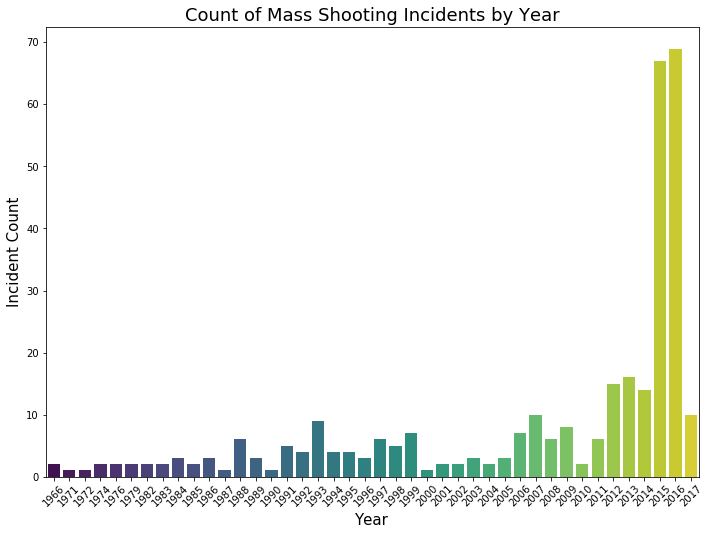

In [9]:
#total counts of incidents by year
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.xticks(rotation=45)
chart1 = sns.barplot(x="Year", y="Total victims", data=test_1, palette="viridis")
plt.title("Count of Mass Shooting Incidents by Year",size=18)
plt.ylabel("Incident Count", size=15)
plt.xlabel("Year", size = 15)


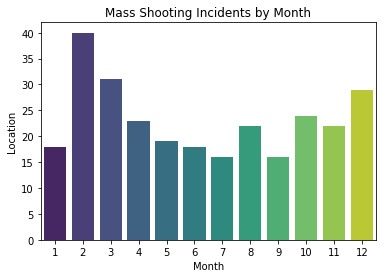

In [10]:
#counts of incidents by month 

month_grouped = shooting_data.groupby(["Month"])["Location"].count().reset_index()
sns.barplot(x="Month",y="Location", data=month_grouped, palette='viridis')

plt.title("Mass Shooting Incidents by Month")

In [11]:
#import ggplot
#ggplot(aes(x='Year',y="Total victims"), data=test_1) + geom_bar()

In [12]:
shooting_data["Gender"].replace('M',"Male", inplace=True)
shooting_data["Gender"].replace('Male/Female',"Unknown",inplace=True)
shooting_data["Gender"].replace('M/F',"Unknown",inplace=True)


#group by gender and year 
shooting_data.groupby(["Year","Gender"])["Gender"].count().unstack().head()

Gender,Female,Male,Unknown
Year,,,
1966,NaN,2.0,NaN
1971,NaN,1.0,NaN
1972,NaN,1.0,NaN
1974,NaN,2.0,NaN
1976,NaN,2.0,NaN


In [13]:
#of all the shootings, how many of them had mental health issues?

len(shooting_data)

323

In [14]:
shooting_data["Mental Health Issues"].replace("Unclear","Unknown",inplace=True)
shooting_data["Mental Health Issues"].replace("unknown","Unknown",inplace=True)

shooting_data.groupby(["Year","Mental Health Issues"])["Mental Health Issues"].count()



Year  Mental Health Issues
1966  Yes                      2
1971  Yes                      1
1972  Yes                      1
1974  No                       1
      Yes                      1
1976  Unknown                  1
      Yes                      1
1979  Unknown                  1
      Yes                      1
1982  Yes                      2
1983  Unknown                  1
      Yes                      1
1984  Yes                      3
1985  Yes                      2
1986  Yes                      3
1987  Yes                      1
1988  No                       2
      Unknown                  1
      Yes                      3
1989  No                       1
      Yes                      2
1990  No                       1
1991  No                       2
      Yes                      3
1992  No                       2
      Unknown                  1
      Yes                      1
1993  No                       5
      Unknown                  1
      Yes       

In [15]:
np.arange(1966,2019)

array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

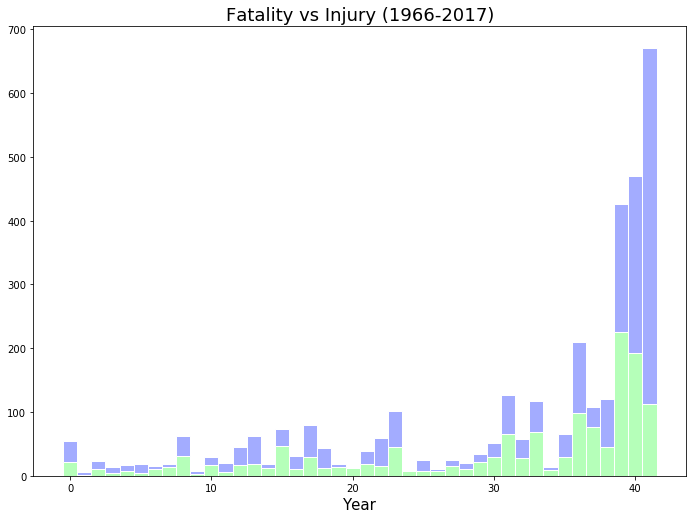

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
bar_width=1

injury_type = shooting_data.groupby(["Year"])["Fatalities","Injured","Total victims"].sum()
r = np.arange(0,len(injury_type))
# r = np.arange(1966,2018)
plt.bar(r,injury_type["Fatalities"],edgecolor="white",color="#b5ffb9",width=bar_width)
plt.bar(r,injury_type["Injured"],edgecolor="white",color="#a3acff",width=bar_width,bottom=injury_type["Fatalities"])
plt.title("Fatality vs Injury (1966-2017)",size=18)
plt.xlabel("Year",size=15)

In [17]:
injury_type

,Fatalities,Injured,Total victims
Year,,,
1966,22,33,54
1971,2,4,5
1972,10,13,22
1974,4,10,14
1976,8,9,17
1979,4,14,18
1982,10,5,14
1983,14,4,18
1984,31,32,61


In [18]:
#change all the races to common race
shooting_data["Race"].replace("Asian American","Asian",inplace=True)
shooting_data["Race"].replace("Asian American/Some other race","Asian",inplace=True)
shooting_data["Race"].replace("Black American or African American","Black",inplace=True)
shooting_data["Race"].replace("Black American or African American/Unknown","Black",inplace=True)
shooting_data["Race"].replace("black","Black",inplace=True)
shooting_data["Race"].replace("White American or European American","White",inplace=True)
shooting_data["Race"].replace("White American or European American/Some other Race","White",inplace=True)
shooting_data["Race"].replace("white","White",inplace=True)

#sum and divide by percentage of each (Last 10 years)

#race pie chart

shooting_data.groupby(["Race"])["Race"].count()

Race
Asian                                18
Black                                85
Latino                                5
Native American or Alaska Native      3
Other                                 2
Some other race                      20
Two or more races                     2
Unknown                              42
White                               144
Name: Race, dtype: int64

In [20]:
shooting_data.to_csv("ShootingData_edited.csv")